# Sprint 9 - Proyecto 

#### Descripción del proyecto
#### o has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

#### Cuentas con: registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018; un archivo con los pedidos en este periodo; estadísticas de gastos de marketing.

### Lo que vas a investigar: 

#### Cómo los clientes usan el servicio; cuándo empiezan a comprar; cuánto dinero aporta cada cliente a la compañía; cuándo los ingresos cubren el costo de adquisición de los clientes.

#### Instrucciones para completar el proyecto

#### Paso 1. Acceda los datos y prepáralos para el análisis

#### Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto. 

#### Rutas de archivos: 

#### visits_log_us.csv Acceda el dataset
#### orders_log_us.csv Acceda el dataset
#### costs_us.csv Acceda el dataset

#### Paso 2. Haz informes y calcula métricas 

#### Visitas:
#### ¿Cuántas personas lo usan cada día, semana y mes?
#### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
#### ¿Cuál es la duración de cada sesión?
#### ¿Con qué frecuencia los usuarios regresan?

#### Ventas:
#### ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
#### ¿Cuántos pedidos hacen durante un período de tiempo dado?
#### ¿Cuál es el tamaño promedio de compra?
#### ¿Cuánto dinero traen? (LTV)
#### Marketing:
#### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
#### ¿Cuán rentables eran las inversiones? (ROMI)
#### Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

#### Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

#### ¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

#### Formato: Completa la tarea en un Jupyter Notebook. Inserta el código en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y encabezados.

#### Descripción de los datos
#### La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

#### Uid: identificador único del usuario.
#### Device: dispositivo del usuario.
#### Start Ts: fecha y hora de inicio de la sesión.
#### End Ts: fecha y hora de término de la sesión.
#### Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
#### Todas las fechas de esta tabla están en formato AAAA-MM-DD.

#### La tabla orders (datos sobre pedidos):

#### Uid: identificador único del usuario que realiza un pedido.
#### Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.
#### La tabla costs (datos sobre gastos de marketing):

#### source_id: identificador de la fuente de anuncios.
#### dt: fecha.
#### costs: gastos en esta fuente de anuncios en este día.

In [2]:
# Importar librerias 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos

visits_log_us = pd.read_csv('visits_log_us.csv')
orders_log_us = pd.read_csv('orders_log_us.csv')
costs_us = pd.read_csv('costs_us.csv')

# Mostrar información del DataFrame

visits_log_us.columns
visits_log_us.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [3]:
# Mostrar información del DataFrame

orders_log_us.head()
orders_log_us.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [4]:
# Mostrar información del DataFrame

costs_us.head()
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### 1.1 Convertir las columnas de fechas al tipo datetime

In [5]:
# Convertir las columnas de fechas al tipo datetime
visits_log_us['Start Ts'] = pd.to_datetime(visits_log_us['Start Ts'])
visits_log_us['End Ts'] = pd.to_datetime(visits_log_us['End Ts'])
orders_log_us['Buy Ts'] = pd.to_datetime(orders_log_us['Buy Ts'])
costs_us['dt'] = pd.to_datetime(costs_us['dt'])

# Comprobar los cambios en los tipos de datos
visits_log_us.info()
orders_log_us.info()
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2

# Análisis de Datos

## Análisis de Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?




In [6]:
# Contamos usuarios únicos por día, semana y mes
daily_users = visits_log_us.resample('D', on='Start Ts')['Uid'].nunique()
weekly_users = visits_log_us.resample('W', on='Start Ts')['Uid'].nunique()
monthly_users = visits_log_us.resample('ME', on='Start Ts')['Uid'].nunique()

# Mostramos los resultados
print("Usuarios únicos por día:")
print(daily_users.head())

print("\nUsuarios únicos por semana:")
print(weekly_users.head())

print("\nUsuarios únicos por mes:")
print(monthly_users.head())

Usuarios únicos por día:
Start Ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Freq: D, Name: Uid, dtype: int64

Usuarios únicos por semana:
Start Ts
2017-06-04    2021
2017-06-11    4129
2017-06-18    2812
2017-06-25    2878
2017-07-02    3064
Freq: W-SUN, Name: Uid, dtype: int64

Usuarios únicos por mes:
Start Ts
2017-06-30    13259
2017-07-31    14183
2017-08-31    11631
2017-09-30    18975
2017-10-31    29692
Freq: ME, Name: Uid, dtype: int64


### Gráfico de líneas para usuarios únicos por día, semana y mes.

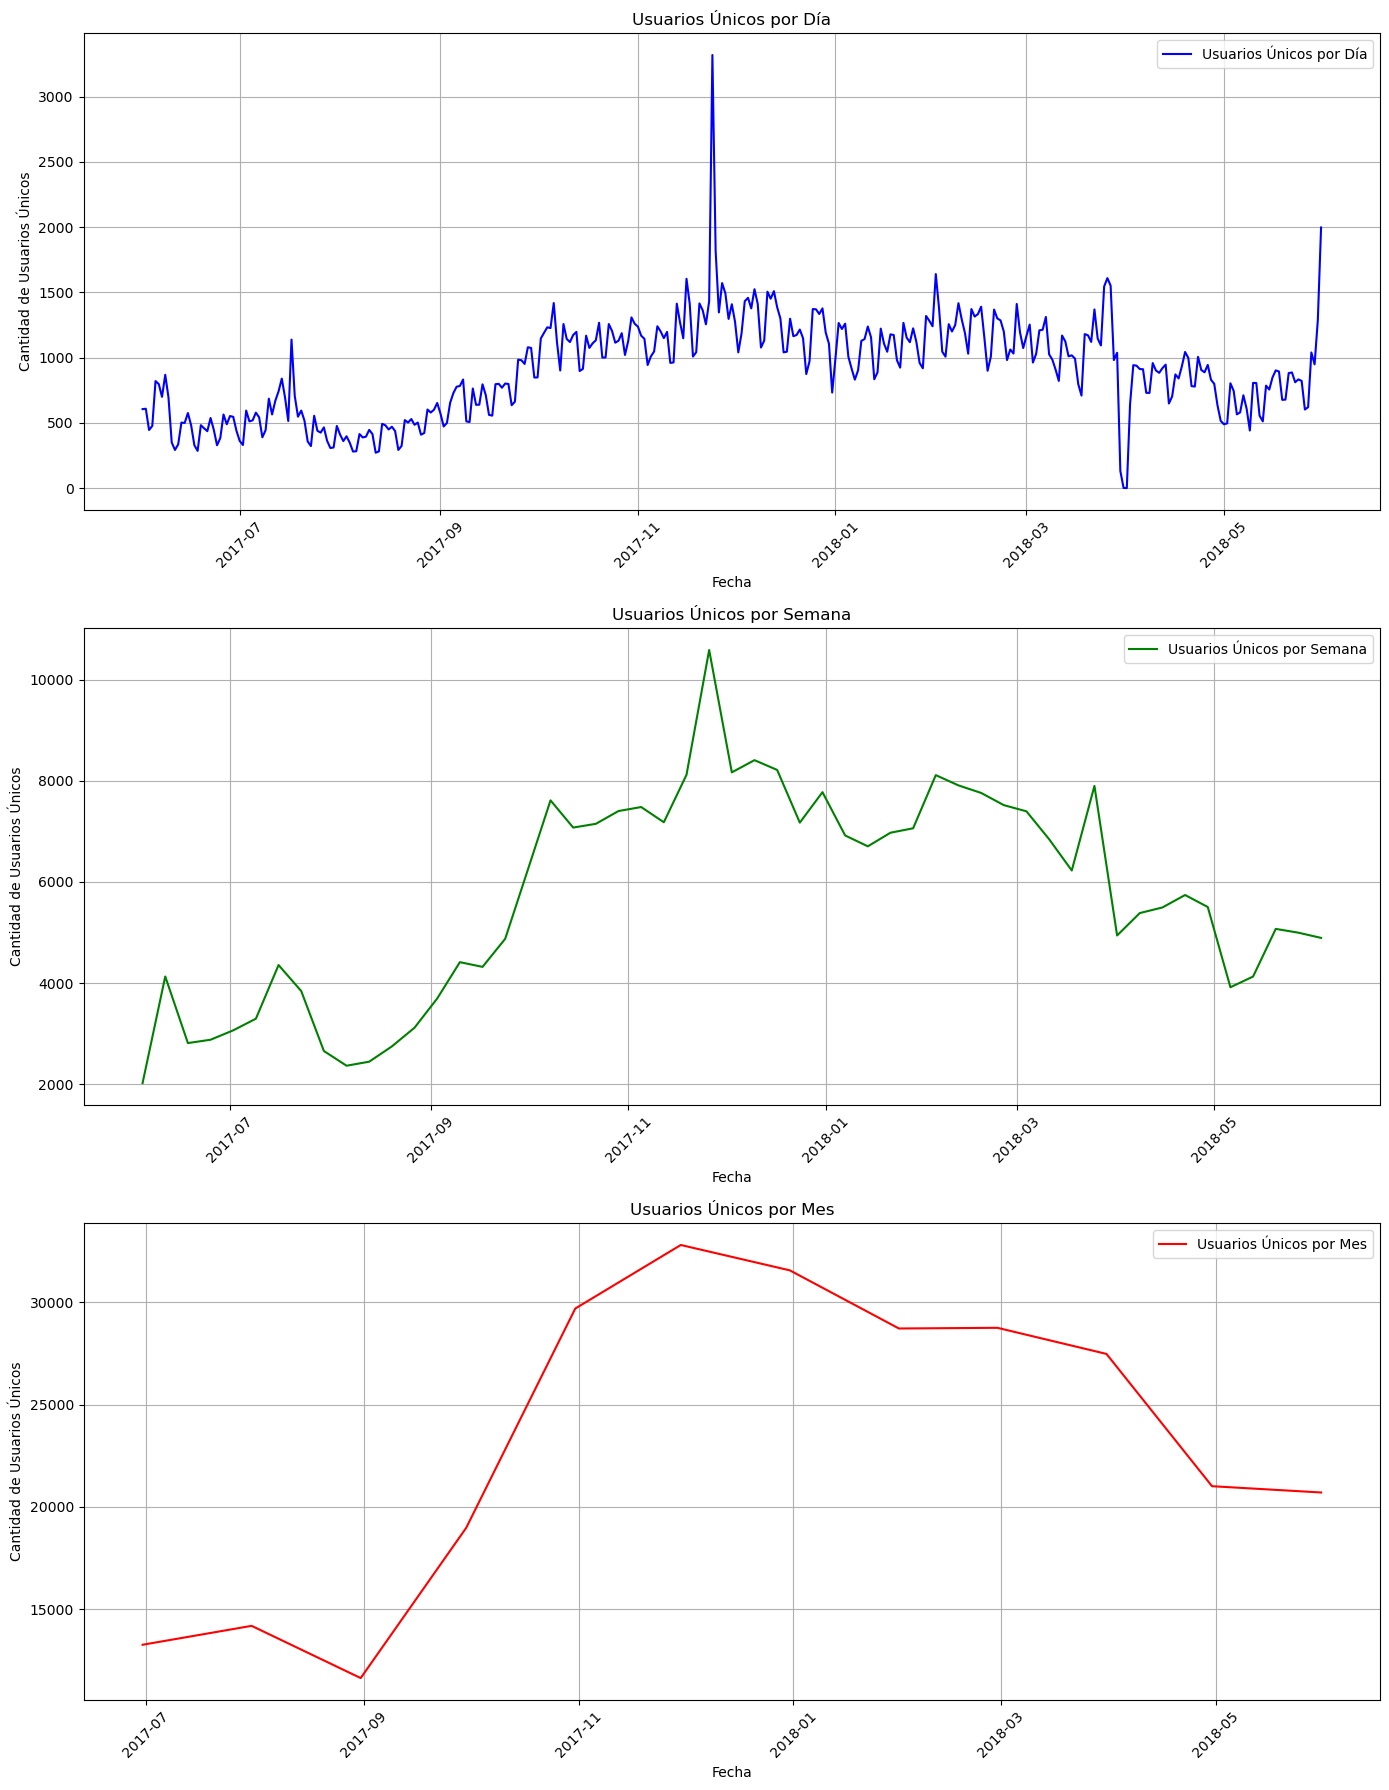

In [7]:
# Asegurémonos de que los índices están en formato datetime.
daily_users.index = pd.to_datetime(daily_users.index)
weekly_users.index = pd.to_datetime(weekly_users.index)
monthly_users.index = pd.to_datetime(monthly_users.index)

# Gráfico de líneas para usuarios únicos por día
plt.figure(figsize=(14, 18))  # Aumentar el tamaño para acomodar 3 gráficos

# Gráfico para usuarios únicos por día
plt.subplot(3, 1, 1)
plt.plot(daily_users.index, daily_users.values, color='b', label='Usuarios Únicos por Día')
plt.title('Usuarios Únicos por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios Únicos')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Gráfico de usuarios únicos por semana
plt.subplot(3, 1, 2)
plt.plot(weekly_users.index, weekly_users.values, color='g', label='Usuarios Únicos por Semana')
plt.title('Usuarios Únicos por Semana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios Únicos')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Gráfico de usuarios únicos por mes
plt.subplot(3, 1, 3)
plt.plot(monthly_users.index, monthly_users.values, color='r', label='Usuarios Únicos por Mes')
plt.title('Usuarios Únicos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios Únicos')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Ajustamos el layout para que no se solapen
plt.tight_layout()
plt.show()

### 1.2 ¿Cuántas sesiones hay por día?

In [8]:
# Contamos sesiones por día
daily_sessions = visits_log_us.resample('D', on='Start Ts')['Uid'].count()

# Mostramos los resultados
print("\nSesiones por día:")
print(daily_sessions.head())


Sesiones por día:
Start Ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Freq: D, Name: Uid, dtype: int64


## Gráfico de líneas para sesiones por día

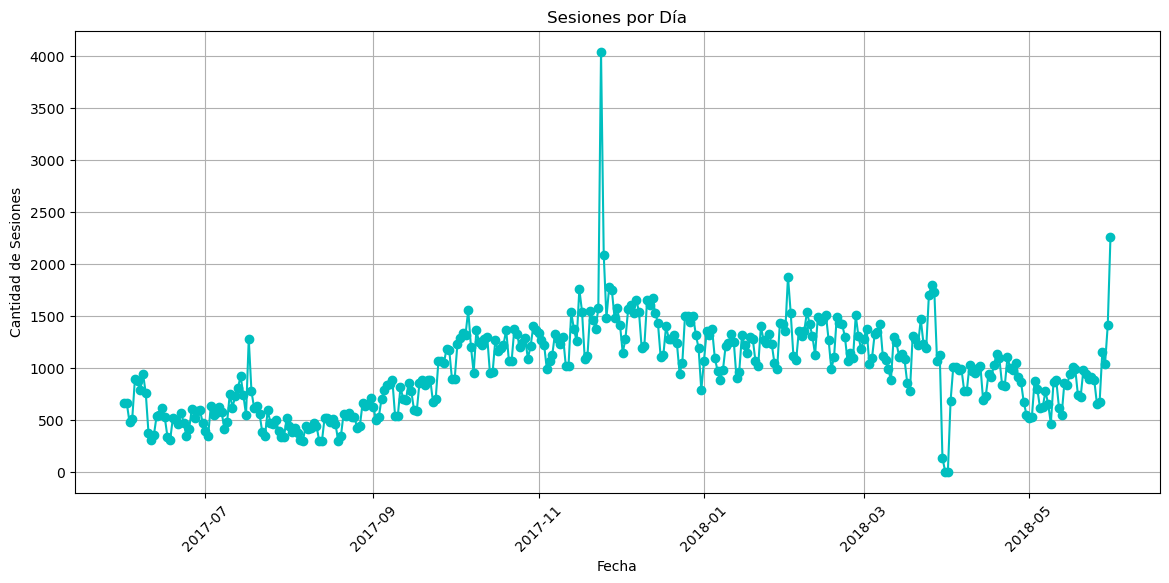

In [9]:
# Gráfico de líneas para sesiones por día
plt.figure(figsize=(14, 6))
plt.plot(daily_sessions.index, daily_sessions.values, marker='o', color='c')
plt.title('Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Sesiones')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

## 1.3 ¿Cuál es la duración de cada sesión?


In [10]:
# Calculamos duración de cada sesión
visits_log_us['Session Duration'] = (visits_log_us['End Ts'] - visits_log_us['Start Ts']).dt.total_seconds()

# Agrupamos la duración de las sesiones por día para ver la tendencia
daily_session_duration = visits_log_us.resample('D', on='Start Ts')['Session Duration'].mean()  # Promedio diario de duración de sesiones

# Mostramos todos los resultados de duración de sesiones
print("\nDuración promedio de sesiones por día (en segundos):")
print(daily_session_duration)


Duración promedio de sesiones por día (en segundos):
Start Ts
2017-06-01    666.320783
2017-06-02    619.840426
2017-06-03    606.958071
2017-06-04    554.309804
2017-06-05    624.450168
                 ...    
2018-05-27    556.964286
2018-05-28    632.819204
2018-05-29    629.428019
2018-05-30    640.707801
2018-05-31    739.752660
Freq: D, Name: Session Duration, Length: 365, dtype: float64


## Gráfico de líneas para la duración promedio de las sesiones por día

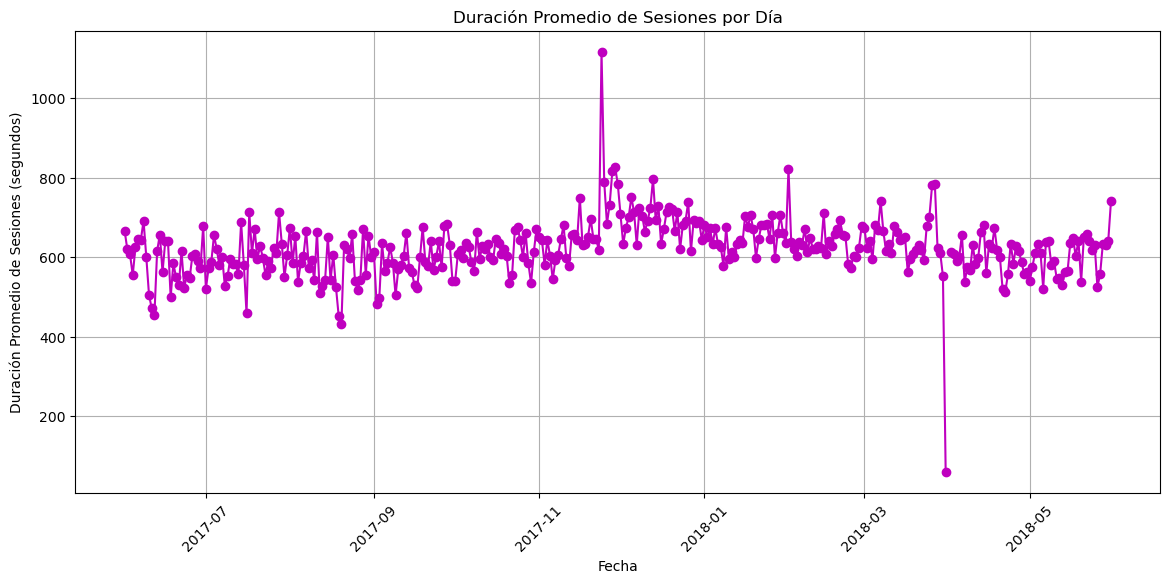

In [11]:
# Gráfico de líneas para la duración promedio de las sesiones por día
plt.figure(figsize=(14, 6))
plt.plot(daily_session_duration.index, daily_session_duration.values, marker='o', color='m')
plt.title('Duración Promedio de Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Duración Promedio de Sesiones (segundos)')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

### ¿Con qué frecuencia los usuarios regresan?

In [12]:
# Analizando la frecuencia de regreso de usuarios
returning_users = visits_log_us.groupby('Uid')['Start Ts'].nunique()

# Mostramos resultados de usuarios que regresan
print("\nFrecuencia de regreso de usuarios:")
print(returning_users.describe())

# Contamos cuántos usuarios regresan un número específico de veces
frequencies = returning_users.value_counts().sort_index()


Frecuencia de regreso de usuarios:
count    228169.000000
mean          1.575144
std           4.646800
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         893.000000
Name: Start Ts, dtype: float64


### Gráfico de líneas para la frecuencia de regreso de usuarios

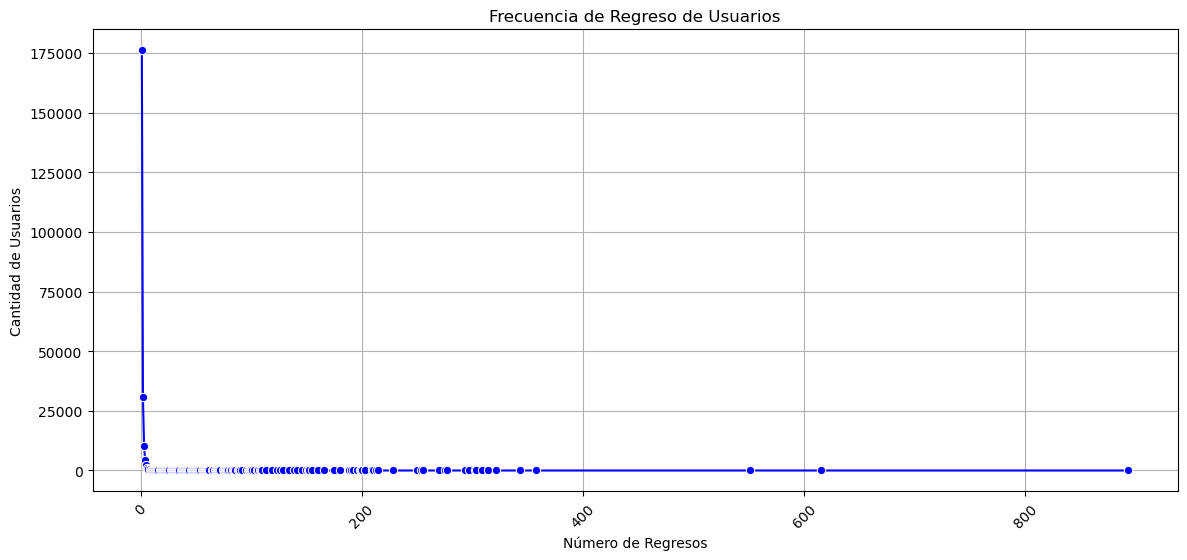

In [13]:
# Gráfico de líneas para la frecuencia de regreso de usuarios
plt.figure(figsize=(14, 6))
sns.lineplot(x=frequencies.index, y=frequencies.values, marker='o', color='b')
plt.title('Frecuencia de Regreso de Usuarios')
plt.xlabel('Número de Regresos')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Análisis de Ventas

### ¿Cuándo empieza la gente a comprar?

In [14]:
# Calculamos el tiempo entre el primer registro y la primera compra
first_purchase = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase['first_visit'] = visits_log_us.groupby('Uid')['Start Ts'].min().reset_index(drop=True)
first_purchase['days_to_conversion'] = (first_purchase['Buy Ts'] - first_purchase['first_visit']).dt.days

# Mostramos días hasta la conversión
print("\nDías hasta la conversión (compra):")
print(first_purchase['days_to_conversion'].describe())


Días hasta la conversión (compra):
count    36523.000000
mean         4.634696
std        134.271855
min       -363.000000
25%        -90.000000
50%          5.000000
75%        100.000000
max        364.000000
Name: days_to_conversion, dtype: float64


### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [16]:
# Contar el número de pedidos en total o por mes
total_orders = orders_log_us['Uid'].count()
monthly_orders = orders_log_us.resample('ME', on='Buy Ts')['Uid'].count()

# Mostramos resultados
print(f"\nTotal de pedidos: {total_orders}")
print("\nPedidos por mes:")
print(monthly_orders.head())


Total de pedidos: 50415

Pedidos por mes:
Buy Ts
2017-06-30    2354
2017-07-31    2363
2017-08-31    1807
2017-09-30    3387
2017-10-31    5679
Freq: ME, Name: Uid, dtype: int64


### ¿Cuál es el tamaño promedio de compra?

In [17]:
# Cálculo del tamaño promedio de compra
average_order_value = orders_log_us['Revenue'].mean()

# Mostramos el tamaño promedio de compra
print(f"\nTamaño promedio de compra: {average_order_value:.2f}")


Tamaño promedio de compra: 5.00


### ¿Cuánto dinero traen? (LTV)


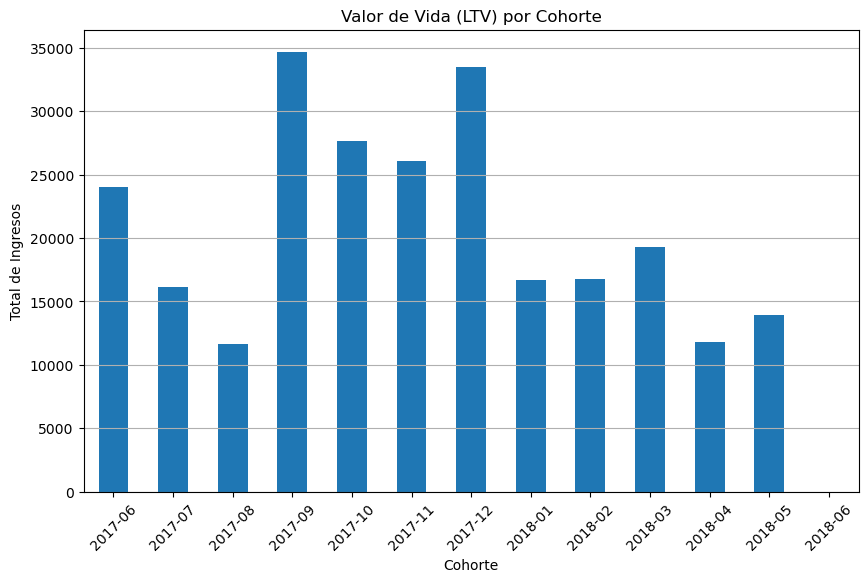


Valor de vida (LTV) total por cohorte:
Cohort
2017-06    24031.69
2017-07    16127.92
2017-08    11606.26
2017-09    34676.32
2017-10    27603.45
2017-11    26098.99
2017-12    33485.74
2018-01    16663.13
2018-02    16750.50
2018-03    19273.41
2018-04    11810.61
2018-05    13925.76
2018-06        3.42
Freq: M, Name: Revenue, dtype: float64

Valor de vida (LTV) promedio: 19389.015384615388


In [18]:
# Obtenemos las fechas de compra y la fecha de registro de usuarios
orders_log_us['Buy Ts'] = pd.to_datetime(orders_log_us['Buy Ts'])

# Para crear las cohortes, primero necesitamos la fecha del primer pedido de cada usuario
first_order_date = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()

# Unimos las fechas de primer pedido a la tabla de pedidos
orders_with_cohort = orders_log_us.merge(first_order_date, on='Uid', suffixes=('', '_first')).rename(columns={'Buy Ts_first': 'Cohort Date'})

# Creamos una columna para la cohorte (usando sólo el año y mes para simplificar)
orders_with_cohort['Cohort'] = orders_with_cohort['Cohort Date'].dt.to_period('M')
orders_with_cohort['Purchase Month'] = orders_with_cohort['Buy Ts'].dt.to_period('M')

# Calculamos el total de ingresos por cohorte y mes
cohort_revenue = orders_with_cohort.groupby(['Cohort', 'Purchase Month'])['Revenue'].sum().reset_index()

# Calculamos el LTV por cohorte
lifetime_value_cohort = cohort_revenue.groupby('Cohort')['Revenue'].sum()

# Visualizamos LTV por cohorte
plt.figure(figsize=(10, 6))
lifetime_value_cohort.plot(kind='bar')
plt.title('Valor de Vida (LTV) por Cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#Mostramos el LTV promedio por cohorte
avg_ltv = lifetime_value_cohort.mean()
print("\nValor de vida (LTV) total por cohorte:")
print(lifetime_value_cohort)
print(f"\nValor de vida (LTV) promedio: {avg_ltv}")

# Análisis de Marketing

### ¿Cuánto dinero se gastó?

In [19]:
# Total gastado
total_costs = costs_us['costs'].sum()

# Gastos por fuente de adquisición
costs_by_source = costs_us.groupby('source_id')['costs'].sum()

# Mostramos resultados
print(f"\nTotal gastado en marketing: {total_costs:.2f}")
print("\nGastos por fuente de adquisición:")
print(costs_by_source)


Total gastado en marketing: 329131.62

Gastos por fuente de adquisición:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


### ¿Cuál fue el costo de adquisición de clientes?

In [20]:
# Cálculo del costo de adquisición de clientes (CAC)
cac = costs_by_source / orders_log_us['Uid'].nunique()

# Mostramos CAC por fuente
print("\nCosto de adquisición de clientes (CAC) por fuente:")
print(cac)


Costo de adquisición de clientes (CAC) por fuente:
source_id
1     0.570415
2     1.172030
3     3.869387
4     1.672196
5     1.417110
9     0.151069
10    0.159420
Name: costs, dtype: float64


### ¿Cuán rentables eran las inversiones? (ROMI)

In [21]:
# Calculando el retorno sobre la inversión de marketing (ROMI)
romi = (orders_log_us['Revenue'].sum() - total_costs) / total_costs

# Mostramos ROMI
print(f"\nRetorno sobre la inversión de marketing (ROMI): {romi:.2f}")


Retorno sobre la inversión de marketing (ROMI): -0.23


### Gráfico de Total Gastado por Fuente de Adquisición

C:\Users\Gadielpepi\AppData\Local\Temp\ipykernel_12920\1918369470.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_id', y='gastos', data=data, palette='viridis')  # Ahora usando hue solo si es necesario


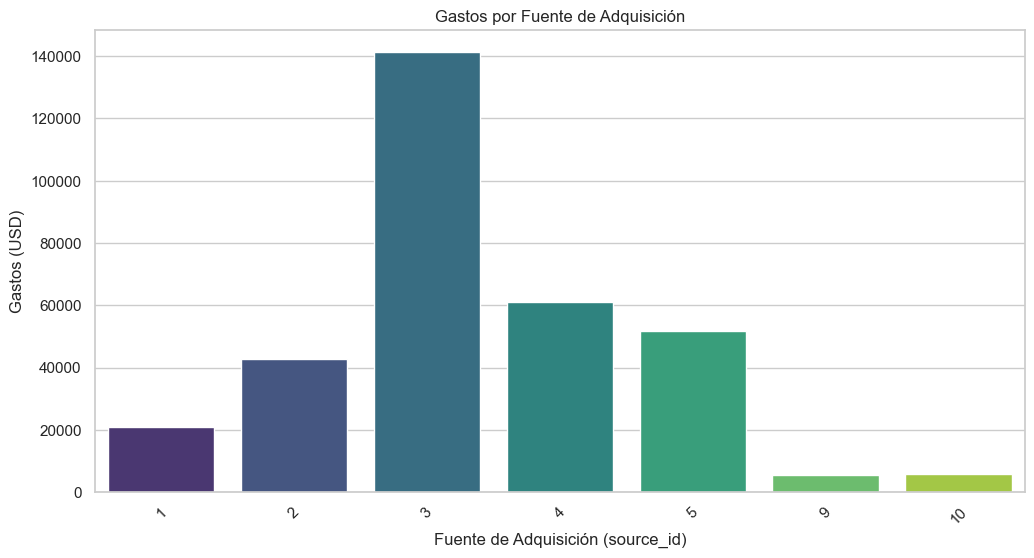

Retorno sobre la inversión de marketing (ROMI): -0.23


In [25]:
# Hacemos la configuración de estilo para los gráficos
sns.set(style="whitegrid")

# 1. Gráfico de Total Gastado por Fuente de Adquisición
plt.figure(figsize=(12, 6))

# Crear un DataFrame a partir de costs_by_source para evitar la advertencia
data = pd.DataFrame({'source_id': costs_by_source.index, 'gastos': costs_by_source.values})

sns.barplot(x='source_id', y='gastos', data=data, palette='viridis')  # Ahora usando hue solo si es necesario
plt.title('Gastos por Fuente de Adquisición')
plt.xlabel('Fuente de Adquisición (source_id)')
plt.ylabel('Gastos (USD)')
plt.xticks(rotation=45)
plt.show()

# Retorno sobre la inversión de marketing (ROMI)
romi = -0.23
print(f"Retorno sobre la inversión de marketing (ROMI): {romi}")

### Gráfico de Retorno sobre la Inversión de Marketing (ROMI)

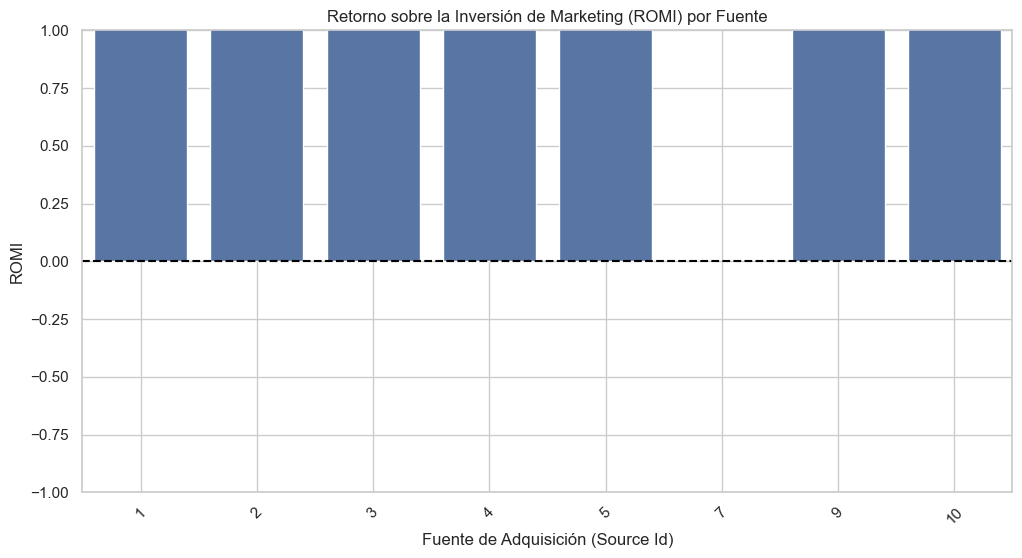

In [27]:
# Unir orders_log_us con visits_log_us para obtener el Source Id
merged_data = orders_log_us.merge(visits_log_us[['Uid', 'Source Id']], on='Uid', how='left')

# Agrupar ingresos por Source Id
revenue_by_source = merged_data.groupby('Source Id')['Revenue'].sum()

# Agrupar costos por source_id de la tabla de costos
costs_by_source = costs_us.groupby('source_id')['costs'].sum()

# Calcular ROMI para cada fuente
romi_by_source = (revenue_by_source - costs_by_source) / costs_by_source

# Preparar los datos para el gráfico
romi_by_source = romi_by_source.reset_index()
romi_by_source.columns = ['Source Id', 'ROMI']

# Gráfico de ROMI por fuente
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Source Id', y='ROMI', data=romi_by_source)  # Eliminado palette
plt.title('Retorno sobre la Inversión de Marketing (ROMI) por Fuente')
plt.xlabel('Fuente de Adquisición (Source Id)')
plt.ylabel('ROMI')
plt.axhline(0, color='black', linestyle='--')  # Línea en Y = 0 para referencia
plt.xticks(rotation=45)
plt.ylim(-1, 1)  # Ajusta los límites del eje Y según sea necesario
plt.grid(True)

# Añadir etiquetas en las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Desplazamiento de la etiqueta
                      textcoords='offset points')

# Mostrar el gráfico
plt.show()

# Conclusión y Recomendaciones para el Departamento de Marketing

#### Después de realizar un análisis exhaustivo de los datos de marketing de Showz, he llegado a varias conclusiones clave que pueden guiar a los expertos del marketing en la optimización de sus gastos y en la toma de decisiones estratégicas.

## 1. Inversión Recomendadas por Fuente de Adquisición

#### Analizando los gastos totales, el costo de adquisición de clientes (CAC) y el retorno sobre la inversión de marketing (ROMI) para cada fuente de publicidad, podemos realizar las siguientes recomendaciones:

## Fuente 3: 

#### Aunque es la que más dinero se ha gastado ($141,321.63), también tiene el CAC más elevado (3.87). Esto indica que, a pesar de generar un volumen alto de ingresos, el costo por cliente adquirido es desproporcionado en comparación con otras fuentes. Sugeriría reducir la inversión en esta fuente y explorar maneras de optimizar las campañas para reducir el CAC.

## Fuente 4 y Fuente 5: 

#### Ambas fuentes muestran CACs de 1.67 y 1.42, respectivamente. Estas métricas son relativamente más bajas en comparación con las demás fuentes de adquisición y sugieren que estas plataformas están siendo más efectivas en la conversión de clientes a un costo razonable. Recomendaría aumentar la inversión en estas fuentes, ya que tienen un retorno potencialmente mayor.

## Fuente 1 y Fuente 2: 

#### Las métricas también son competitivas, con CACs de 0.57 y 1.17. Aunque tienen costos de adquisición bajos, su volumen de gasto es comparativamente bajo. Se podría considerar aumentar ligeramente el gasto y monitorear su rendimiento.

## Fuentes 9 y 10: 

#### Estas fuentes presentan los CACs más bajos (0.15 y 0.16, respectivamente) y son altamente eficientes en términos de costo. Sugeriría aumentar la inversión aquí, ya que cada dólar gastado resulta en un coste de adquisición muy favorable.

## 2. Métricas Enfocadas y Conclusiones Clave


### El enfoque se centró principalmente en las siguientes métricas:

#### Total Gastado: Para entender la inversión actual y su distribución entre las diferentes fuentes. 
#### Costo de Adquisición de Clientes (CAC): Crucial para evaluar la efectividad de cada fuente de adquisición y el costo asociado a la conversión de nuevos clientes.
#### Retorno sobre la Inversión de Marketing (ROMI): Para determinar si los gastos en marketing están produciendo un retorno positivo o negativo.
#### La conclusión general es que la inversión en marketing debe centrarse en las fuentes con un CAC bajo y un alto potencial de retorno. Además, las fuentes que actualmente muestran altos CACs deberían ser reevaluadas y ajustadas para maximizar la rentabilidad.

## 3. Estrategia Futura

#### Monitorear y Ajustar Inversiones: Implementar un sistema de monitoreo continuo para evaluar la efectividad de las inversiones en plataformas específicas, ajustando gastos según se obtenga nueva información.

#### Pruebas A/B: Realizar pruebas A/B en las campañas de las fuentes con costos de adquisición más altos para identificar áreas de mejora en la conversión y optimizar el retorno.

#### Diversificación de Canales: Considerar la exploración de nuevas fuentes de adquisición o estrategias de marketing digital que puedan diversificar el riesgo y potencialmente ofrecer mejores resultados.

# Conclusión Final

## Al tomar decisiones informadas sobre las inversiones en marketing basadas en análisis de datos, Showz puede optimizar sus gastos y maximizar su retorno, garantizando un crecimiento sostenible en la captación de clientes y en la rentabilidad general del negocio.